In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [4]:
# Read in CSVs
hate_crimes_by_socioeconomic = pd.read_csv("./data/hate_crimes.csv")

In [5]:
# Feature Selection
no_HI = hate_crimes_by_socioeconomic[hate_crimes_by_socioeconomic.state != 'Hawaii']
no_HI = no_HI.rename(columns={'hate_crimes_per_100k_splc': 'hate_crimes'})
no_HI = no_HI.rename(columns={'avg_hatecrimes_per_100k_fbi': 'avg_hate_crimes'})
array = no_HI.values
x = array[:,1:10]
y = array[:,10]
y = y.astype('float')
model = LinearRegression()
rfe = RFE(model)
fit = rfe.fit(x, y)

#print("Num Features: %s" % (fit.n_features_))
#print("Selected Features: %s" % (fit.support_))
#print("Feature Ranking: %s" % (fit.ranking_))
#median_household_income, share_population_in_metro_areas, share_population_with_high_school_degree, share_non_white
# linear regression: share_unemployed_seasonal, shared_population_with_high_school_degree, share_white_poverty, gini_index

columns = "+".join(['share_unemployed_seasonal', 'share_population_with_high_school_degree', 'share_white_poverty', 'gini_index'])

multi_model = smf.ols('hate_crimes ~' + (columns), data = no_HI).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            hate_crimes   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     9.745
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           9.16e-06
Time:                        18:07:06   Log-Likelihood:                 14.833
No. Observations:                  50   AIC:                            -19.67
Df Residuals:                      45   BIC:                            -10.11
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -9.5499      1.799     -5.309      0.000     -13.173      -5.927
share_unemployed_seasonal                    4.8572      3.364      1.444      0.156      -1.919      11.633
share_population_with_high_school_degree     6.6298      1.316      5.038      0.000       3.979       9.280
share_white_poverty                          1.1103      1.352      0.821      0.416      -1.613       3.833
gini_index                                   8.2733      1.771      4.672      0.000       4.707      11.840
==============================================================================
Omnibus:                        2.289   Durbin-Watson:                   2.258
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.605
Skew:                           0.430   Prob(JB):                        0.448
Kurtosis:                       3.176   Cond. No.                         182.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

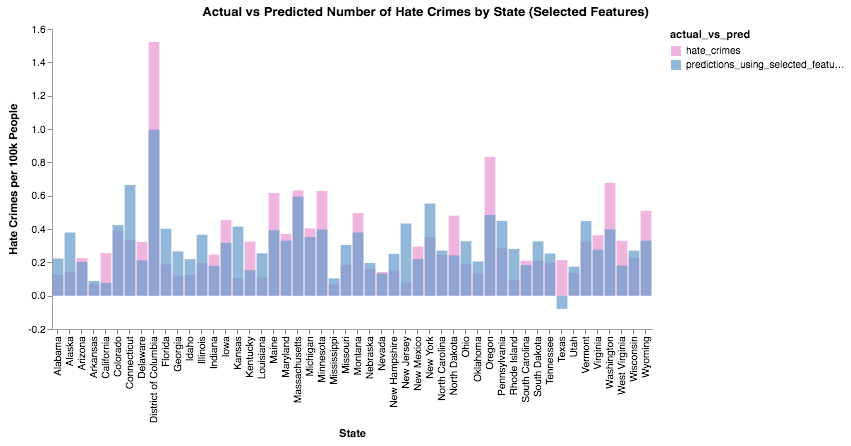

In [7]:
no_HI['predictions_using_selected_features'] = multi_model.predict()
pred_actual_melt = no_HI[['state', 'hate_crimes', 'predictions_using_selected_features']]
pred_actual_melt = pred_actual_melt.melt('state', var_name='actual_vs_pred', value_name='value')

#alt.Chart(pred_actual_melt).mark_bar(stroke='transparent').encode(
 #   alt.X('actual_vs_pred', scale=alt.Scale(rangeStep=12), axis=alt.Axis(title='')),
  #  alt.Y('value', axis=alt.Axis(title='population', grid=False)),
   # color=alt.Color('actual_vs_pred', scale=alt.Scale(range=["#EA98D2", "#659CCA"])),
    #column = 'state'
#).configure_view(
 #   stroke='transparent'
#).configure_axis(
#    domainWidth=0.8
#)

selected_features_actual_preds = alt.Chart(pred_actual_melt).mark_bar(opacity = 0.7).encode(
    alt.X('state', scale=alt.Scale(rangeStep=12), axis=alt.Axis(title='State')),
    alt.Y('value', axis=alt.Axis(title='Hate Crimes per 100k People', grid=False), stack = None),
    color=alt.Color('actual_vs_pred', scale=alt.Scale(range=["#EA98D2", "#659CCA"])),
).configure_view(
    stroke='transparent'
).configure_axis(
    domainWidth=0.8
).properties (
    title = 'Actual vs Predicted Number of Hate Crimes by State (Selected Features)'
)
selected_features_actual_preds

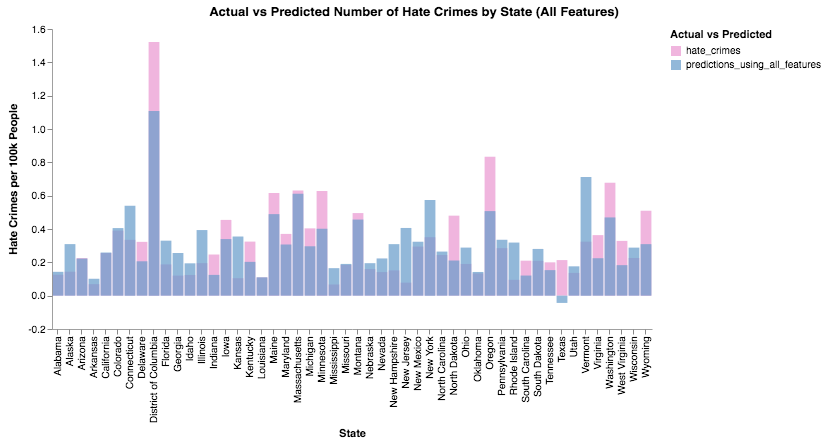

In [8]:
# Modeling with all features
multi_model_all = smf.ols('hate_crimes ~ median_household_income + share_unemployed_seasonal + share_population_in_metro_areas + share_population_with_high_school_degree + share_non_citizen + share_white_poverty + gini_index + share_non_white + share_voters_voted_trump', data = no_HI).fit()
multi_model_all.summary()

no_HI['predictions_using_all_features'] = multi_model_all.predict()
pred_actual_melt_all = no_HI[['state', 'hate_crimes', 'predictions_using_all_features']]
pred_actual_melt_all = pred_actual_melt_all.melt('state', var_name='actual_vs_pred', value_name='value')

all_features_actual_preds = alt.Chart(pred_actual_melt_all).mark_bar(opacity = 0.7).encode(
    alt.X('state', scale=alt.Scale(rangeStep=12), axis=alt.Axis(title='State')),
    alt.Y('value', axis=alt.Axis(title='Hate Crimes per 100k People', grid=False), stack = None),
    color=alt.Color('actual_vs_pred', scale=alt.Scale(range=["#EA98D2", "#659CCA"]), legend = alt.Legend(title = 'Actual vs Predicted')),
).configure_view(
    stroke='transparent'
).configure_axis(
    domainWidth=0.8
).properties (
    title = 'Actual vs Predicted Number of Hate Crimes by State (All Features)'
)
all_features_actual_preds

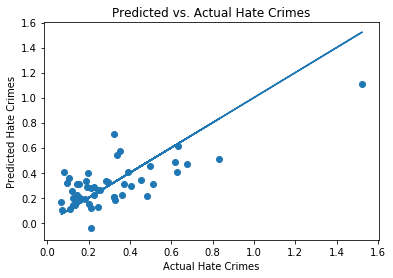

In [7]:
# Compares actual hate crime cases to predicted
pred_actual_hate_crime = plt.figure()
plt.scatter(no_HI.hate_crimes, no_HI.predictions_using_all_features)
#plt.plot(no_HI[hate_crimes', 'multi_preds_all', kind="scatter")
plt.plot(no_HI.hate_crimes, no_HI.hate_crimes)
plt.title('Predicted vs. Actual Hate Crimes')
plt.xlabel('Actual Hate Crimes')
plt.ylabel('Predicted Hate Crimes');

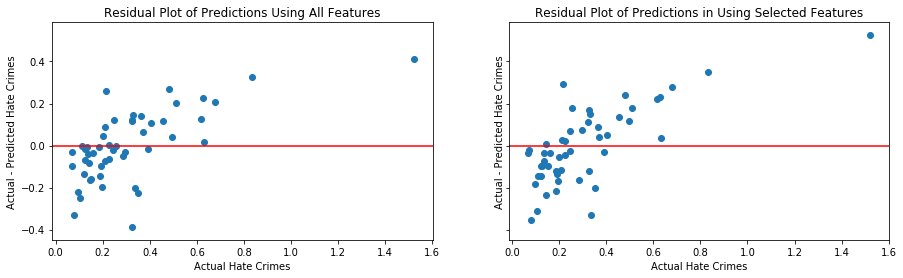

In [9]:
# Residual plot
f, (plot1, plot2) = plt.subplots(1, 2, sharey=True)
f.set_figwidth(15)
plot1.scatter(no_HI.hate_crimes, no_HI.hate_crimes - no_HI.predictions_using_all_features)
plot1.axhline(0, color='red')
plot1.set_title('Residual Plot of Predictions Using All Features')
plot1.set_xlabel('Actual Hate Crimes')
plot1.set_ylabel('Actual - Predicted Hate Crimes')
plot2.scatter(no_HI.hate_crimes, no_HI.hate_crimes - no_HI.predictions_using_selected_features)
plot2.axhline(0, color='red')
plot2.set_title('Residual Plot of Predictions in Using Selected Features')
plot2.set_xlabel('Actual Hate Crimes')
plot2.set_ylabel('Actual - Predicted Hate Crimes');

#predictions_using_selected_features

In [10]:
# Average hate crime cases from 2010 - 2015
multi_model_all = smf.ols('avg_hate_crimes ~ median_household_income + share_unemployed_seasonal + share_population_in_metro_areas + share_population_with_high_school_degree + share_non_citizen + share_white_poverty + gini_index + share_non_white + share_voters_voted_trump', data = no_HI).fit()
multi_model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        avg_hate_crimes   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     4.454
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           0.000438
Time:                        17:33:50   Log-Likelihood:                -80.036
No. Observations:                  50   AIC:                             180.1
Df Residuals:                      40   BIC:                             199.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  -43.8072     18.294     -2.395      0.021     -80.780      -6.834
median_household_income                   2.077e-05   5.08e-05      0.409      0.685   -8.19e-05       0.000
share_unemployed_seasonal                   26.2347     27.027      0.971      0.338     -28.388      80.857
share_population_in_metro_areas             -2.6598      1.843     -1.443      0.157      -6.385       1.066
share_population_with_high_school_degree    22.6704     13.553      1.673      0.102      -4.722      50.063
share_non_citizen                           21.0749     12.525      1.683      0.100      -4.240      46.390
share_white_poverty                          2.9232     16.349      0.179      0.859     -30.119      35.966
gini_index                                  58.9289     15.413      3.823      0.000      27.778      90.080
share_non_white                             -3.9257      2.813     -1.395      0.171      -9.612       1.760
share_voters_voted_trump                    -1.7975      3.107     -0.578      0.566      -8.078       4.483
==============================================================================
Omnibus:                        0.801   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.360
Skew:                           0.196   Prob(JB):                        0.835
Kurtosis:                       3.138   Cond. No.                     8.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

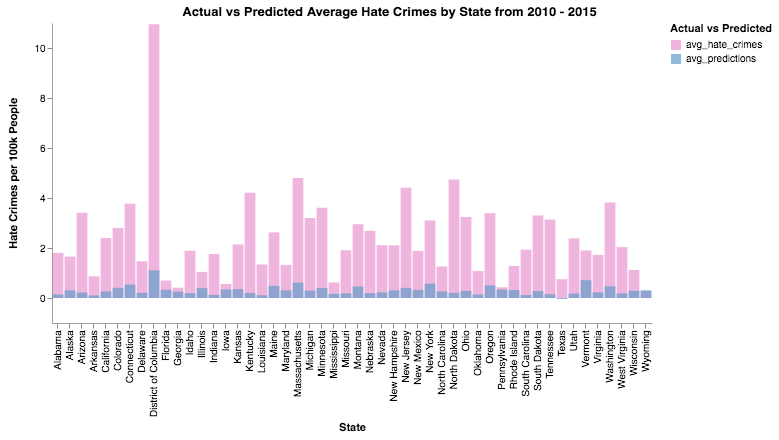

In [9]:
# Average hate crime cases from 2010 - 2015
no_HI['avg_predictions'] = multi_model_all.predict()
pred_actual_melt_all = no_HI[['state', 'avg_hate_crimes', 'avg_predictions']]
pred_actual_melt_all = pred_actual_melt_all.melt('state', var_name='actual_vs_pred', value_name='value')

actual_preds_by_state = alt.Chart(pred_actual_melt_all).mark_bar(opacity = 0.7).encode(
    alt.X('state', scale=alt.Scale(rangeStep=12), axis=alt.Axis(title='State')),
    alt.Y('value', axis=alt.Axis(title='Hate Crimes per 100k People', grid=False), stack = None),
    color=alt.Color('actual_vs_pred', scale=alt.Scale(range=["#EA98D2", "#659CCA"]), legend = alt.Legend(title = 'Actual vs Predicted')),
).configure_view(
    stroke='transparent'
).configure_axis(
    domainWidth=0.8
).properties (
    title = 'Actual vs Predicted Average Hate Crimes by State from 2010 - 2015'
)
actual_preds_by_state

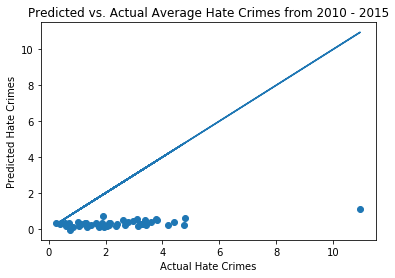

In [11]:
# Compares actual hate crime cases to predicted
fbi_actual_preds_hate_crimes = plt.figure()
plt.scatter(no_HI.avg_hate_crimes, no_HI.avg_predictions)
plt.plot(no_HI.avg_hate_crimes, no_HI.avg_hate_crimes)
plt.title('Predicted vs. Actual Average Hate Crimes from 2010 - 2015')
plt.xlabel('Actual Hate Crimes')
plt.ylabel('Predicted Hate Crimes');

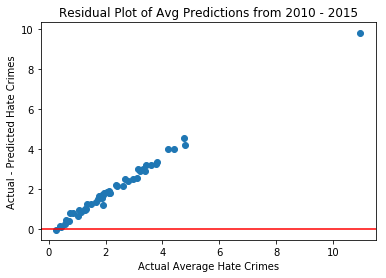

In [12]:
# Residual plot
fbi_residual_plot = plt.scatter(no_HI.avg_hate_crimes, no_HI.avg_hate_crimes - no_HI.avg_predictions)
plt.axhline(0, color='red')
plt.title('Residual Plot of Avg Predictions from 2010 - 2015')
plt.xlabel('Actual Average Hate Crimes')
plt.ylabel('Actual - Predicted Hate Crimes');